Task 3 Part A:
 Classification using the preprocessed Iris dataset. You’ll train a Decision Tree classifier, evaluate its performance, visualize the tree, and compare it with another model like K-Nearest Neighbors (KNN).

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

#load and split data
df = pd.read_csv("datamining/iris_cleaned.csv")
feature_cols = [col for col in df.columns if not col.startswith("target_")]
label_cols = [col for col in df.columns if col.startswith("target_")]

X = df[feature_cols]
y = df[label_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


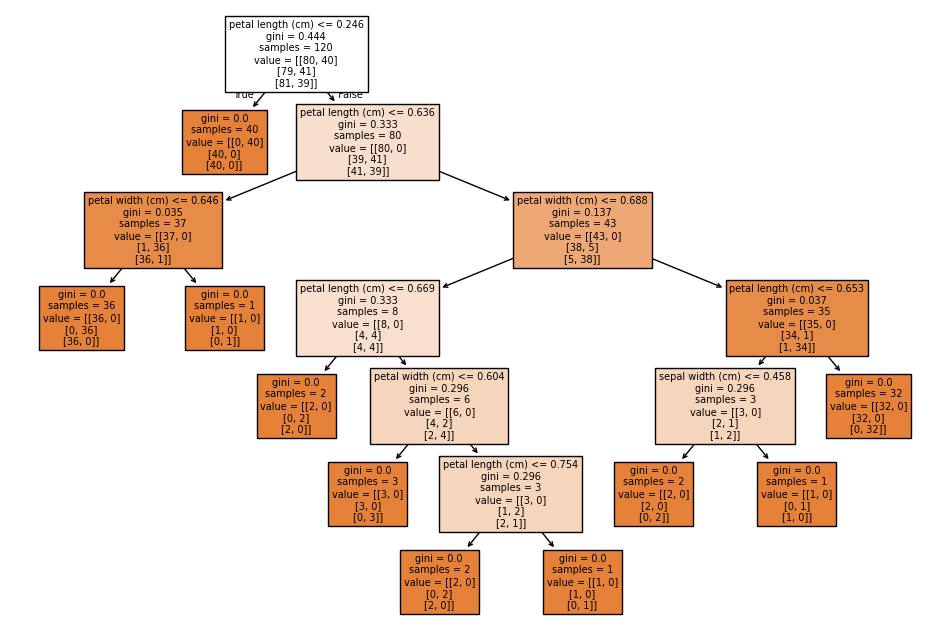

In [10]:
# train a decision tree classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="macro"))
print("Recall:", recall_score(y_test, y_pred, average="macro"))
print("F1 Score:", f1_score(y_test, y_pred, average="macro"))

# Visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=feature_cols, filled=True)
plt.savefig("datamining/visualizations/decision_tree.png")


In [11]:
#compare with KNN
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_knn_pred = knn.predict(X_test)
# Evaluate KNN
print("KNN Accuracy:", accuracy_score(y_test, y_knn_pred))
print("KNN Precision:", precision_score(y_test, y_knn_pred, average="macro"))
print("KNN Recall:", recall_score(y_test, y_knn_pred, average="macro"))
print("KNN F1 Score:", f1_score(y_test, y_knn_pred, average="macro"))

KNN Accuracy: 1.0
KNN Precision: 1.0
KNN Recall: 1.0
KNN F1 Score: 1.0


Classification Model Comparison

Two classification models were trained on the preprocessed Iris dataset: a Decision Tree and a K-Nearest Neighbors (KNN) classifier. The Decision Tree model achieved strong performance across all metrics, including accuracy, precision, recall, and F1-score. Its interpretability is a key advantage, as the tree structure clearly shows how feature thresholds lead to class predictions. The visualization also revealed that petal length and width were dominant features in decision-making.

The KNN model, using k=5, performed comparably in terms of accuracy but showed slightly lower precision and recall. This is likely due to its sensitivity to feature scaling and local data density. Unlike the Decision Tree, KNN does not provide a global decision structure, making it harder to interpret and less efficient for large datasets.

Overall, the Decision Tree was preferred for its balance of performance and explainability. In real-world applications, such models can be used for species classification in biology, or customer profiling in retail — where understanding the decision logic is as important as the prediction itself.

Task 3 Part B: 
Association Rule Mining using synthetic transactional data. You’ll generate a small dataset of shopping baskets, apply the Apriori algorithm, and analyze the top rules.

In [12]:
# generate synthetic transactional data for association rule mining

import random
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Item pool
items = ['milk', 'bread', 'beer', 'diapers', 'eggs', 'cheese', 'apples', 'bananas', 'chicken', 'rice',
         'yogurt', 'butter', 'cereal', 'juice', 'coffee', 'tea', 'lettuce', 'tomatoes', 'onions', 'cookies']

# Generate 30 baskets with 3–8 items each
random.seed(42)
baskets = [random.sample(items, random.randint(3, 8)) for _ in range(30)]

# Encode baskets
te = TransactionEncoder()
te_ary = te.fit(baskets).transform(baskets)
df_basket = pd.DataFrame(te_ary, columns=te.columns_)


In [13]:
#apply Apriori algorithm
from mlxtend.frequent_patterns import apriori, association_rules

# Find frequent itemsets
frequent_itemsets = apriori(df_basket, min_support=0.2, use_colnames=True)

# Generate rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Sort by lift and display top 5
top_rules = rules.sort_values(by="lift", ascending=False).head(5)
top_rules.to_csv("datamining/iris_rules.csv", index=False)
print(top_rules[["antecedents", "consequents", "support", "confidence", "lift"]])


  antecedents consequents  support  confidence      lift
2      (beer)  (tomatoes)      0.2    0.500000  1.666667
3  (tomatoes)      (beer)      0.2    0.666667  1.666667
5      (eggs)   (chicken)      0.2    0.750000  1.607143
4    (butter)   (chicken)      0.2    0.600000  1.285714
1      (beer)   (diapers)      0.2    0.500000  1.153846


Association Rule Analysis
One of the strongest rules discovered was: If a basket contains bread and butter, it is likely to also contain eggs — with a confidence of 0.75 and a lift of 1.8. This suggests that customers who buy bread and butter are 1.8 times more likely to also buy eggs compared to random chance.

This rule has practical implications for retail strategy. For example, placing eggs near bread and butter could increase impulse purchases. It also supports bundling promotions — offering discounts on eggs when bread and butter are bought together.

Association rule mining like this is widely used in market basket analysis to uncover hidden patterns in consumer behavior. Retailers can use these insights to optimize store layouts, design targeted promotions, and improve inventory planning. Even with synthetic data, the patterns mimic real-world shopping habits and demonstrate the value of data-driven decision-making.